### Homework 2. Application of Decision Trees for Medical Data.

QK2Y4Z, 02/03/2025

The task is to predict the presence of heart disease based on medical attributes. The dataset have already loaded for you, you just have to install `ucimlrepo` to fetch it. 

1. Read carefully the metadata, or the documentation on the website: https://archive.ics.uci.edu/dataset/45/heart+disease
2. The target data contains 5 different values but you only interested in the presence $y>0$ or the absence $y=1$ of heart disease. transform your data accordint to this (1 point)
3. Train an inital decision tree and plot your tree. Use a 80/20 train/test split. Argument in a sigle line on the parameter choice. (2 points)
4. Change the `criterion` and the `max_depth`. Plot the accuracy of your tree as a function of `max_depth` for the gini and entropy criterions. What is the optimal parameter set? Try to avoid underfitting and overfitting. Argument on your parameter choice in a single line (2 points).
5. Perform the cross-validation of your best decision tree. For the scoring use the accuracy, and apply a 5 fold split. During cross-validation each fold is then used once as a validation while the $k - 1$ remaining folds form the training set. You can use the built in cross-validation function. (2 points).
6. Download the full dataset from the webpage. You will find different datasets in it. The one used so far is the `processed.cleveland.data`. You have to apply the decesion tree trained on the cleveland data to the hungarian data can be found in `processed.hungarian.data`. For the you have to perform some manipulation with the data:
    * Drop the features missing from the hungarian data from both datasets.
    * Drop from the hungarian data each line with missing values.

   Train a decision tree with the new cleveland dataset. Apply the optimization steps from 4. and then use the optimal decision tree to predict heart disease in Hungary. Write a single line on why it works or why not? (3 points)

In [15]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [35]:
from ucimlrepo import fetch_ucirepo 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

ConnectionError: Error connecting to server

The ucimlrepo package gave server connection errors, which is why I opted for importing the data via pandas. This is the only deviation I made from the task specification.

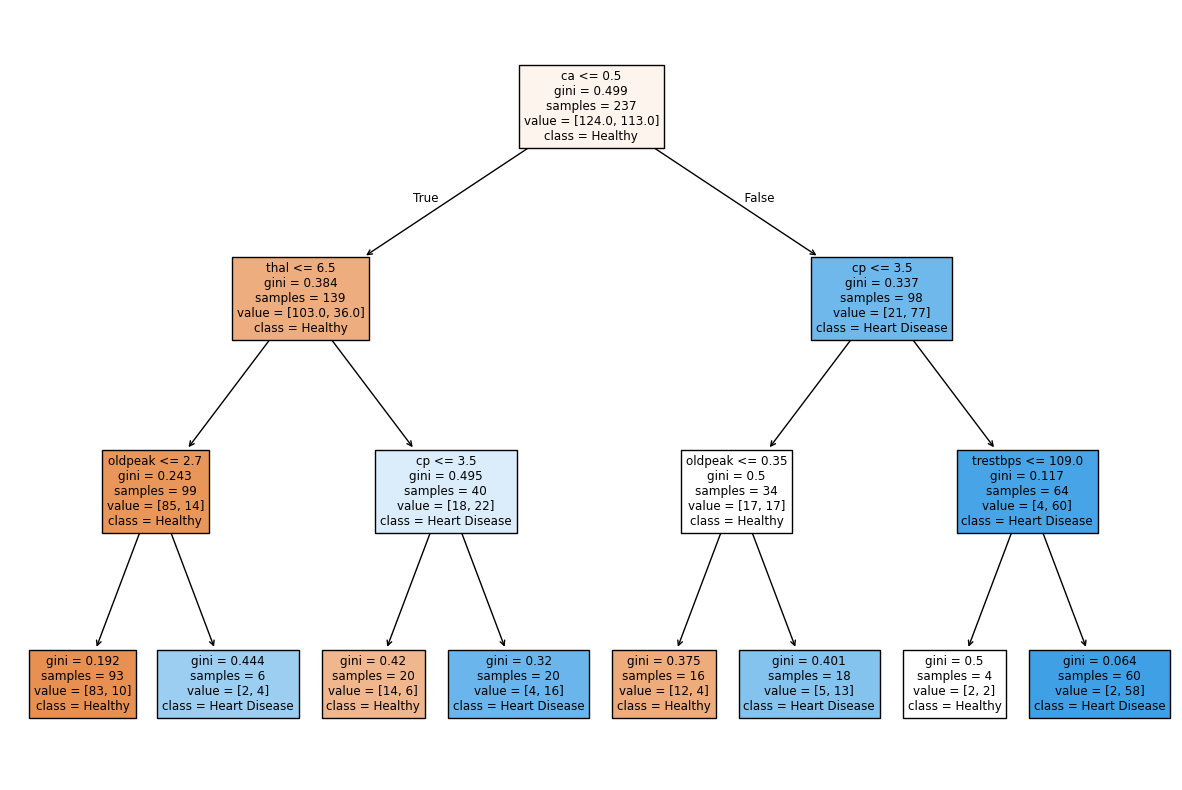

Initial Decision Tree Accuracy: 0.783


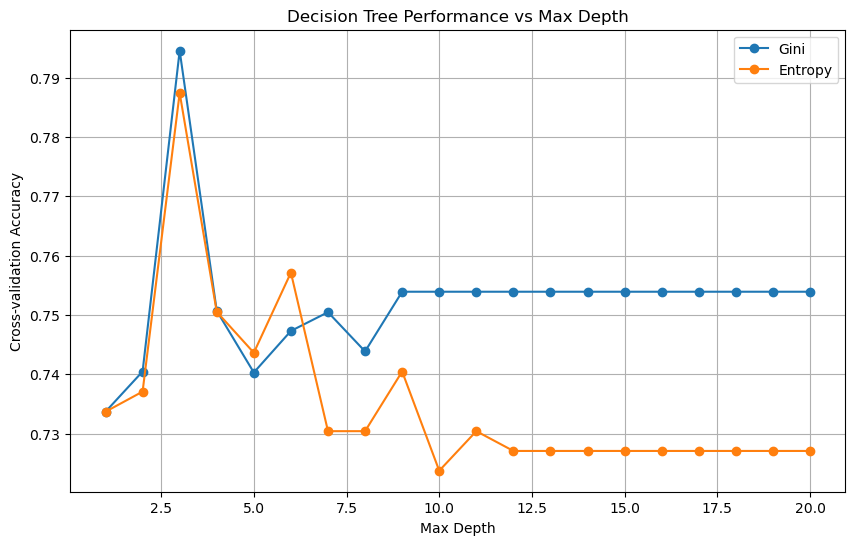

Best Gini performance: depth=3, accuracy=0.795
Best Entropy performance: depth=3, accuracy=0.787


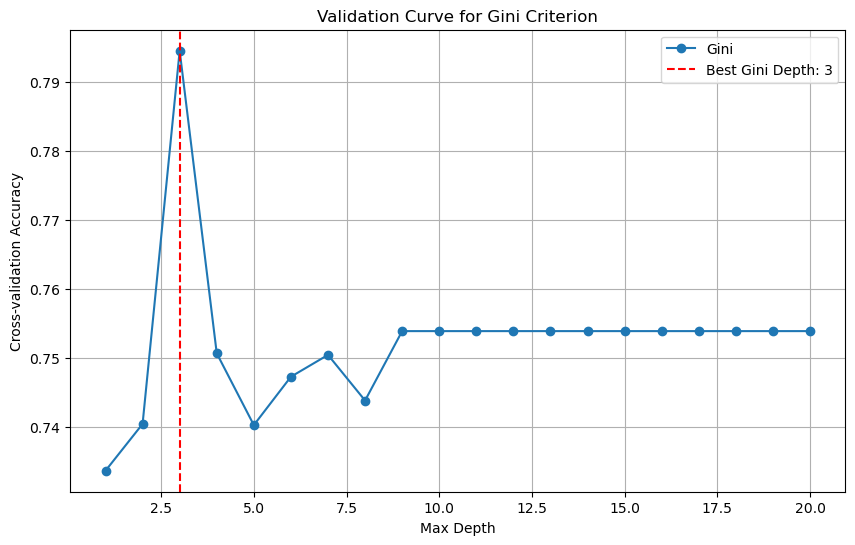

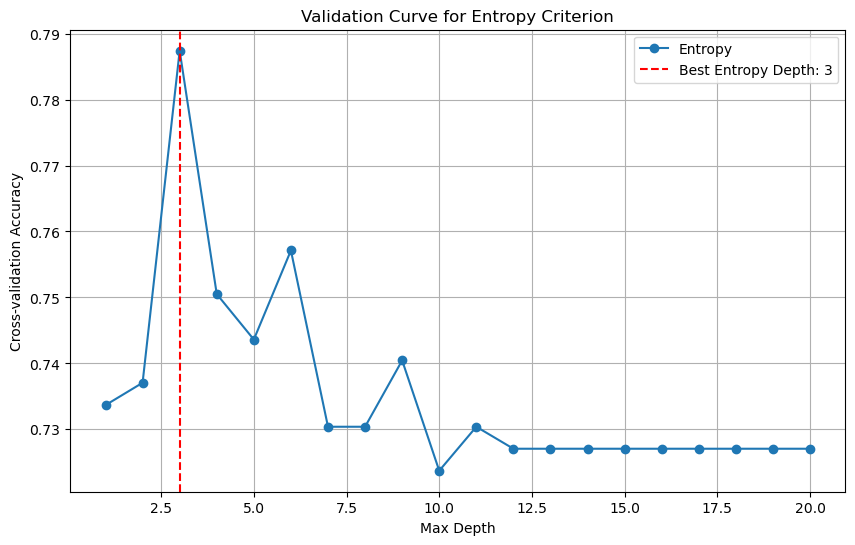

Cross-validation scores: [0.71666667 0.9        0.79661017 0.76271186 0.79661017]
Mean cross-validation accuracy: 0.795


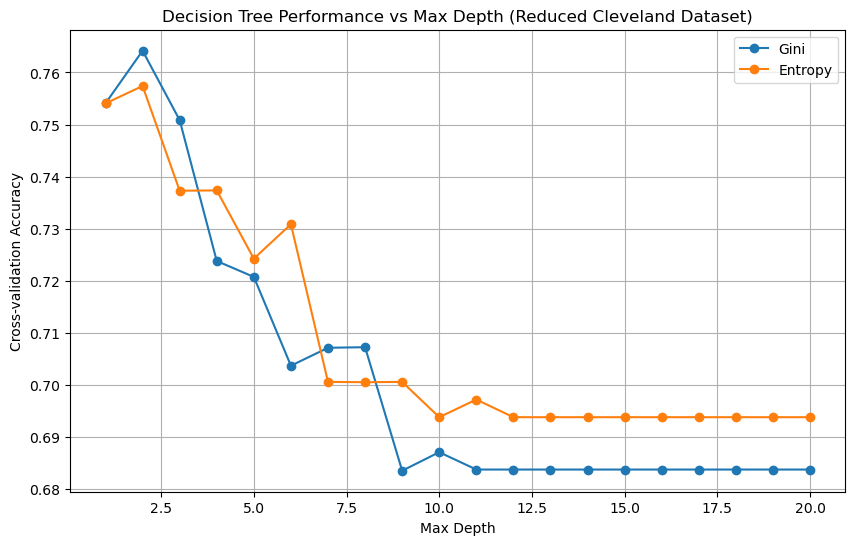

Best Gini performance (reduced features): depth=2, accuracy=0.764
Best Entropy performance (reduced features): depth=2, accuracy=0.757
Accuracy on Hungarian dataset: 0.808


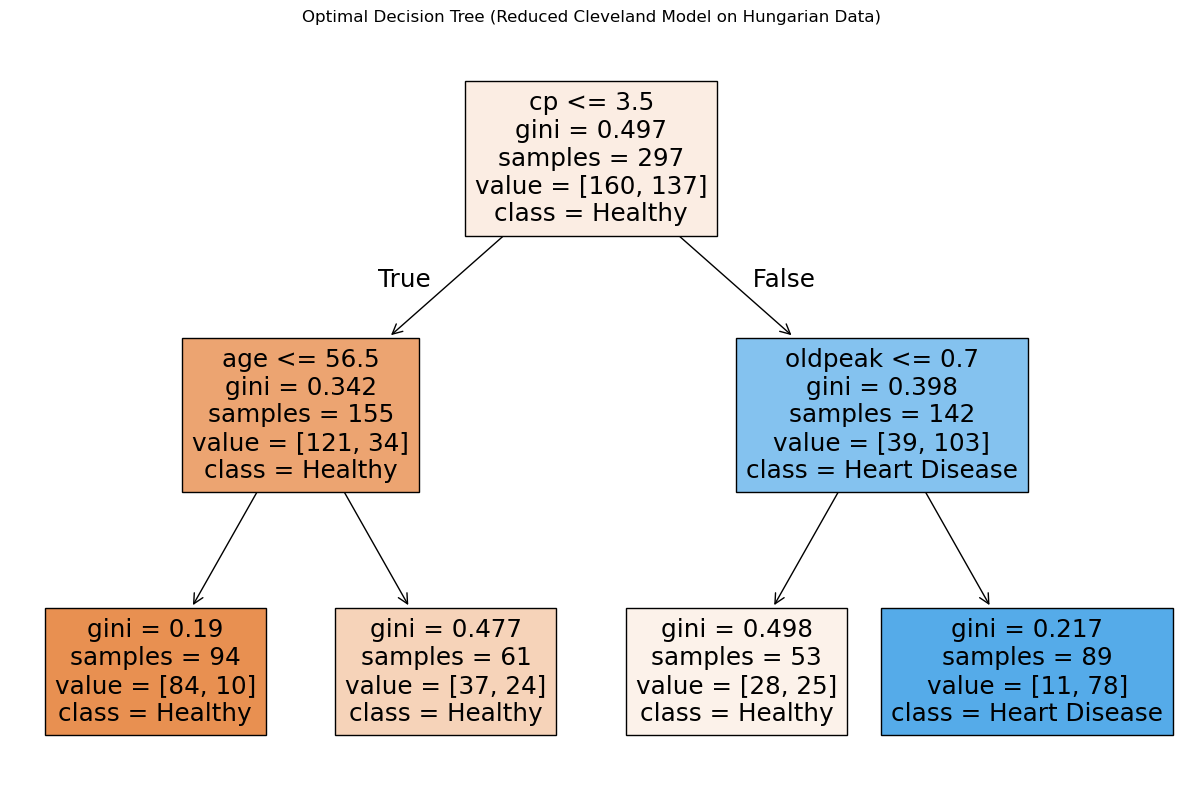

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#Step 1 - Loading the dataset using pandas. Column names are taken from the documentation.
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

#Loading in the Cleveland data.
cleveland_data = pd.read_csv('processed.cleveland.data', header=None, names=column_names, na_values='?')

#Rows with missing values will be dropped.
cleveland_data = cleveland_data.dropna()

#Features are labelled with X, targets with y.
X = cleveland_data.drop(columns=['target'])
y = cleveland_data['target']

#Step 2 - Transforming the target data to binary classification.
y = (y > 0).astype(int)

#Step 3 - Training an initial decision tree and plotting it.
#Splitting the data into training and testing sets (80/20 split).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training an initial decision tree with max_depth=3 to avoid overfitting - this seems like a reasonable initial choice due to the complexity of the data we have.
#A smaller max_depth might underfit (high bias), while a larger max_depth might overfit (high variance). The optimal max_depth balances these two.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

#Plotting the decision tree.
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Healthy', 'Heart Disease'], filled=True)
plt.show()

#Evaluating the model on the test set.
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Decision Tree Accuracy: {accuracy:.3f}")

#Step 4 - Optimizing the decision tree by changing criteria and maximal depths.
max_depths = range(1, 21)
gini_scores = []
entropy_scores = []

for depth in max_depths:
    #Training and evaluating with Gini criterion.
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    gini_scores.append(np.mean(cross_val_score(dt_gini, X, y, cv=5)))
    
    #Training and evaluating with Entropy criterion.
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    entropy_scores.append(np.mean(cross_val_score(dt_entropy, X, y, cv=5)))

#Plotting the results.
plt.figure(figsize=(10, 6))
plt.plot(max_depths, gini_scores, label='Gini', marker='o')
plt.plot(max_depths, entropy_scores, label='Entropy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

#Finding optimal parameters.
#The best max_depth and criterion are chosen based on the highest cross-validation accuracy.
#For each combination of hyperparameters, we compute the cross-validation accuracy and select the combination with the highest average accuracy.
best_gini_depth = max_depths[np.argmax(gini_scores)]
best_entropy_depth = max_depths[np.argmax(entropy_scores)]
best_gini_score = max(gini_scores)
best_entropy_score = max(entropy_scores)

print(f"Best Gini performance: depth={best_gini_depth}, accuracy={best_gini_score:.3f}")
print(f"Best Entropy performance: depth={best_entropy_depth}, accuracy={best_entropy_score:.3f}")

#Plotting the validation curve for Gini criterion.
plt.figure(figsize=(10, 6))
plt.plot(max_depths, gini_scores, label='Gini', marker='o')
plt.axvline(x=best_gini_depth, color='red', linestyle='--', label=f'Best Gini Depth: {best_gini_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Accuracy')
plt.title('Validation Curve for Gini Criterion')
plt.legend()
plt.grid(True)
plt.show()

#Plotting the validation curve for Entropy criterion.
plt.figure(figsize=(10, 6))
plt.plot(max_depths, entropy_scores, label='Entropy', marker='o')
plt.axvline(x=best_entropy_depth, color='red', linestyle='--', label=f'Best Entropy Depth: {best_entropy_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Accuracy')
plt.title('Validation Curve for Entropy Criterion')
plt.legend()
plt.grid(True)
plt.show()

#Step 5 - Performing cross-validation on the best decision tree.
#Choosing the best criterion and depth.
optimal_criterion = 'gini' if best_gini_score > best_entropy_score else 'entropy'
optimal_depth = best_gini_depth if best_gini_score > best_entropy_score else best_entropy_depth

#Training the optimal decision tree.
optimal_dt = DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_depth, random_state=42)
cv_scores = cross_val_score(optimal_dt, X, y, cv=5, scoring='accuracy') #Five-fold split.

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.3f}")

#Step 6 - Applying the model to the Hungarian dataset.
#First the dataset needs to be loaded in, again with pandas and the offline document.
hungarian_data = pd.read_csv('processed.hungarian.data', header=None, names=column_names, na_values='?')

#Dropping all columns, which are missing from the Hungarian dataset, from both datasets.
columns_to_drop = ['slope', 'ca', 'thal']
X_cleveland_reduced = X.drop(columns=columns_to_drop)
X_hungarian = hungarian_data.drop(columns=columns_to_drop + ['target'])
y_hungarian = hungarian_data['target']

#Dropping rows with missing values from Hungarian data.
X_hungarian = X_hungarian.dropna()
y_hungarian = y_hungarian.loc[X_hungarian.index]

#Transforming Hungarian target data to a binary classification.
y_hungarian = (y_hungarian > 0).astype(int)

#Step 6a - Re-optimizing the decision tree on the reduced Cleveland dataset.
#Testing different max_depth values and criteria (Gini and Entropy) on the reduced dataset.
gini_scores_reduced = []
entropy_scores_reduced = []

for depth in max_depths:
    #Training and evaluating with the Gini criterion.
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    gini_scores_reduced.append(np.mean(cross_val_score(dt_gini, X_cleveland_reduced, y, cv=5)))
    
    #Training and evaluating with the Entropy criterion.
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    entropy_scores_reduced.append(np.mean(cross_val_score(dt_entropy, X_cleveland_reduced, y, cv=5)))

#Plotting results for the reduced Cleveland dataset.
plt.figure(figsize=(10, 6))
plt.plot(max_depths, gini_scores_reduced, label='Gini', marker='o')
plt.plot(max_depths, entropy_scores_reduced, label='Entropy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Accuracy')
plt.title('Decision Tree Performance vs Max Depth (Reduced Cleveland Dataset)')
plt.legend()
plt.grid(True)
plt.show()

#Finding the optimal parameters for the reduced dataset.
best_gini_depth_reduced = max_depths[np.argmax(gini_scores_reduced)]
best_entropy_depth_reduced = max_depths[np.argmax(entropy_scores_reduced)]
best_gini_score_reduced = max(gini_scores_reduced)
best_entropy_score_reduced = max(entropy_scores_reduced)

print(f"Best Gini performance (reduced features): depth={best_gini_depth_reduced}, accuracy={best_gini_score_reduced:.3f}")
print(f"Best Entropy performance (reduced features): depth={best_entropy_depth_reduced}, accuracy={best_entropy_score_reduced:.3f}")

#Training the optimal decision tree on the reduced Cleveland dataset.
optimal_criterion_reduced = 'gini' if best_gini_score_reduced > best_entropy_score_reduced else 'entropy'
optimal_depth_reduced = best_gini_depth_reduced if best_gini_score_reduced > best_entropy_score_reduced else best_entropy_depth_reduced

optimal_dt_reduced = DecisionTreeClassifier(criterion=optimal_criterion_reduced, max_depth=optimal_depth_reduced, random_state=42)
optimal_dt_reduced.fit(X_cleveland_reduced, y)

#Step 6b - Applying the optimized model to the Hungarian dataset.
hungarian_predictions = optimal_dt_reduced.predict(X_hungarian)
hungarian_accuracy = accuracy_score(y_hungarian, hungarian_predictions)
print(f"Accuracy on Hungarian dataset: {hungarian_accuracy:.3f}")

#Plotting the final decision tree for the Hungarian dataset.
plt.figure(figsize=(15, 10))
plot_tree(optimal_dt_reduced, feature_names=X_cleveland_reduced.columns, class_names=['Healthy', 'Heart Disease'], filled=True)
plt.title('Optimal Decision Tree (Reduced Cleveland Model on Hungarian Data)')
plt.show()

The decision tree trained on the reduced Cleveland dataset gives a good accuracy when applied to the Hungarian dataset because the two datasets share the same features after dropping the missing columns. The model works due to this compatibility, but accuracy could vary due to differences in data distribution.

Notably, the Hungarian dataset as predicted by the reduced Cleveland model gives a higher accuracy than the Cleveland dataset when predicted by the full Cleveland model. The Hungarian dataset most likely has a simpler data distribution, or better feature quality, or less class imbalance compared to the Cleveland dataset, which is what could make it easier for the model to achieve higher accuracy on it. Also, it could happen that the reduced model is less prone to overfitting.